In [1]:
# Importo pandas y matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leo el csv que contiene el dataset
df = pd.read_csv('../attacks.csv')
df.head()
# Saco el numero de columnas y filas del dataframe original
df.shape

(5992, 24)

In [3]:
# Saco el numero total de valores nulos
df.isnull().sum().sum()

23109

In [4]:
# Saco el numero de valores nulos por columnas
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [5]:
# Saco el numero de valores no nulos por columna
not_null_cols = df.notnull()
not_null_cols.sum()

Case Number               5992
Date                      5992
Year                      5992
Type                      5992
Country                   5949
Area                      5590
Location                  5496
Activity                  5465
Name                      5792
Sex                       5425
Age                       3311
Injury                    5965
Fatal (Y/N)               5973
Time                      2779
Species                   3058
Investigator or Source    5977
pdf                       5992
href formula              5991
href                      5989
Case Number.1             5992
Case Number.2             5992
original order            5992
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [6]:
# Renombro columnas
df = df.rename(columns={"Unnamed: 22":"Unnamed1"})
df = df.rename(columns={"Unnamed: 23":"Unnamed2"})

In [7]:
# Elimino Unnamed1 y Unnamed 2 por irrelevantes basado en el hecho de que solo tenian 1 o 2 valores no nulos y tambien por irrelevantes para mi hipotesis
df = df.drop("Unnamed1", axis=1)
df = df.drop("Unnamed2", axis=1)

In [8]:
# Elimino mas columnas por las mismas razones
df = df.drop(["href", "href formula", "pdf", "Date", "Sex ", "Investigator or Source", "Case Number", "Case Number.1", "Case Number.2", "Time", "Location", "original order", "Injury", "Name", "Age", "Area", "Year", "Country", ], axis=1)

In [9]:
# Vuelvo a ver cuantos valores no nulos hay en las columnas con las que me he quedado
not_null_cols = df.notnull()
not_null_cols.sum()

Type           5992
Activity       5465
Fatal (Y/N)    5973
Species        3058
dtype: int64

In [10]:
# Renombro esta columna para que sea mas facil referenciarla
df = df.rename(columns={"Fatal (Y/N)":"Fatal"})

In [11]:
# Con esta tambien hago lo mismo
df = df.rename(columns={"Species ":"Species"})

In [12]:
# Cambio el tipo de datos de la columna Fatal para evitar futuros errores potenciales conociendo el tipo de datos que contienen
df["Fatal"] = df["Fatal"].astype(str)
fatal_col_nulls = df["Fatal"].isnull().sum()
fatal_col_not_nulls = df["Fatal"].notnull().sum()
# Veo cuantos valores nulos y no nulos tienen para hacerme una idea
print("Fatal total null values:", fatal_col_nulls)
print("Fatal total not null values:", fatal_col_not_nulls)

Fatal total null values: 0
Fatal total not null values: 5992


In [13]:
# Hago un set para agrupar solo cada valor distinto y al saber que esta columna solo deberia admitir dos valores (Y, N)
# Me doy cuenta que hay mas valores distintos de los que me sirven
fatal_set = set(df["Fatal"])
print(fatal_set)

{' N', 'n', 'N ', 'F', 'Y', 'N', '#VALUE!', 'nan', 'UNKNOWN'}


In [14]:
# Por otra parte uso el mismo approach para investigar la columnas Species
df["Species"].value_counts()
species_set = set(df["Species"])
species_set
df["Species"] = df["Species"].astype(str)

In [15]:
# Me doy cuenta que en la columna Species hay ciertas filas con valor "Shark involment not confirmed"
# Procedo a eliminar dichas filas que contengan ese valor para mitigar la ambiguedad en mi dataset
# Tambien procedo a eliminar filas vacias en esa columna y registros de ataques que no sean de tiburon
df = df[df.Species != "Shark involvement not confirmed"]
df = df[df.Species != "nan"]
df = df[df.Species != "Lesser spotted dogfish, Scyliorhinus canicula, less than 80 cm in length"]
df = df[df.Species != "NaN"]
df["Species"].value_counts()

White shark                                          161
Tiger shark                                           68
Bull shark                                            52
6' shark                                              40
4' shark                                              39
                                                    ... 
Bull shark, 2.3 m [7.5']                               1
2.1 m [7'] shark, possibly a spinner shark             1
>2.4 m [8'] shark                                      1
9-foot shark                                           1
Said to involve 6 to 7 m [20' to 23'] white shark      1
Name: Species, Length: 1536, dtype: int64

In [16]:
# Hago lo mismo con la columna Fatal y veo que hay mas de dos posibles valores distintos 
# y cuantos registros hay de cada valor distinto
df["Fatal"].value_counts()

N          2473
Y           471
UNKNOWN      21
nan           7
 N            5
Name: Fatal, dtype: int64

In [17]:
# Procedo a cambiar los registros mal escritos pero cuyo valor no es ambiguo
df["Fatal"] = df["Fatal"].str.replace(" N","N")
df["Fatal"] = df["Fatal"].str.replace("N ","N")
df["Fatal"] = df["Fatal"].str.replace("n","N")

In [18]:
# Procedo a eliminar las filas cuyos valores aportan ambiguedad
# por ejemplo "F" podria ser "Fatal" o "False"
df = df[df.Fatal != "UNKNOWN"]
df = df[df.Fatal != "nan"]
df = df[df.Fatal != "F"]
df = df[df.Fatal != "#VALUE!"]
df = df[df.Fatal != "NaN"]

In [19]:
# ahora imprimo los valores distintos y su ocurrencia y veo que me he quedado con dos valores distintos
# que era lo que me interesaba
df["Fatal"].value_counts()

N    2478
Y     471
Name: Fatal, dtype: int64

In [20]:
# Uso el metodo describe para ver un poco la descripcion estadistica y asegurarme de que no se me haya colado otro valor
# Notese que pone "unique 2" por lo cual todo bajo control
df["Fatal"].describe()

count     2949
unique       2
top          N
freq      2478
Name: Fatal, dtype: object

In [21]:
# Veo como va quedando el dataframe
df

,Type,Activity,Fatal,Species
4,Unprovoked,Surfing,N,2 m shark
6,Unprovoked,Wading,N,3' to 4' shark
7,Unprovoked,Swimming,N,"Tiger shark, 10?"
12,Unprovoked,Spearfishing,N,White shark
13,Unprovoked,Surfing,N,"Bull shark, 6'"
...,...,...,...,...
5966,Unprovoked,Standing,Y,12' tiger shark
5983,Unprovoked,Fishing,Y,Blue pointer
5984,Unprovoked,Fishing,Y,Blue pointer
5985,Unprovoked,Fishing,Y,Blue pointers


In [22]:
# Procedo a hacer lo mismo con la columna Type
df["Type"].value_counts()

Unprovoked      2151
Provoked         395
Boat             161
Invalid          160
Boating           52
Sea Disaster      30
Name: Type, dtype: int64

In [23]:
# Procedo a eliminar los valores ambiguos
df = df[df.Type != "Sea Disaster"]
df = df[df.Type != "Invalid"]
df = df[df.Type != "Boat"]
df = df[df.Type != "Boating"]
df["Type"].value_counts()

Unprovoked    2151
Provoked       395
Name: Type, dtype: int64

In [24]:
# Veo un poco la estadistica descriptiva de la columna Species y me doy cuenta de que hay muchos valores distintos
df["Species"].describe()

count            2546
unique           1323
top       White shark
freq              119
Name: Species, dtype: object

In [25]:
# Imprimo las ocurrencias de cada valor unico y veo que en cierto punto comienza a haber un desastre
df["Species"].value_counts()

White shark                                                           119
Tiger shark                                                            59
Bull shark                                                             50
4' shark                                                               39
6' shark                                                               39
                                                                     ... 
White shark, 2.5 m [8.25'], an immature female, previously injured      1
Bronze whaler shark, 2.5m                                               1
White shark according to tooth pattern and witnesses                    1
 Bull shark, 8'                                                         1
Said to involve 6 to 7 m [20' to 23'] white shark                       1
Name: Species, Length: 1323, dtype: int64

In [26]:
# Comienzo a reemplazar strings que contengan informacion concreta sobre la especie de tiburon involucrado en el ataque
df["Species"] = df["Species"].str.replace("4.2 m white shark", "White shark")

In [27]:
# Hago e imprimo un set para ver con detalle cuales son esos miles de valores unicos en esa columna
set(df["Species"])

{"Tiger shark, 13' ",
 'Raggedtooth shark, 150-kg',
 '2 sharks, 4.5 m & 3 m ',
 "2.3 m [7'] shark",
 'Blacktip reef shark pup',
 "Tiger shark, 2.1 m [7']",
 'Nurse shark, 58", 34-lb ',
 "Nurse shark, 2.1 m [7'] ",
 'Possibly a Caribbean reef shark',
 "2' shark",
 "Raggedtooth shark, 1.2 m [4'] ",
 "Bull shark, 9' to 10'",
 'Tiger shark caught 6 days later with diver�s remains in its gut',
 ">6.7 m [22']  shark",
 "Tiger shark, 10'  ",
 'Lemon shark, 1.8 m [6\'] male, N. breviostris, identified by W.A. Stark II, later the same day a 6\'8" pregnant female lemon shark bit the bow of the boat',
 '80-lb hooked shark',
 "3' to 3.5' shark",
 "1.8 m [6'] shark",
 "White shark, 2.4 m [8']",
 'whaler shark',
 "2.7 m [9']shark",
 "Nurse shark, 2.1 m [7']  identified by Dr. E. Clark on color & tooth impressions",
 '1 m shark',
 "1.5 to 2 m [5' to 6.75'] shark",
 "1.2 m to 1.5 m [4' to 5'] hammerhead shark",
 '3 m white shark',
 'Sandtiger shark, 2 m, male ',
 "Nurse shark, 4'",
 'Possibly a white 

In [28]:
# Aca comienzo a limpiar manualmente cada valor unico y reasignarlo a su especie
# Uso el metodo str.startswith() para ahorrarme cierta cantidad de trabajo donde el nombre del tiburon este al principio
df.loc[df['Species'].str.startswith('Bull'), "Species"] = 'Bull shark'
df.loc[df['Species'].str.startswith('Tiger'), "Species"] = 'Tiger shark'
df.loc[df['Species'].str.startswith('White shark'), "Species"] = 'White shark'
df.loc[df['Species'].str.startswith('Lemon'), "Species"] = 'Lemon shark'
df.loc[df['Species'].str.startswith('Zambesi'), "Species"] = 'Zambesi shark'
df.loc[df['Species'].str.startswith('Blue'), "Species"] = 'Blue shark'
df.loc[df['Species'].str.startswith('\"sand\"'), "Species"] = 'Sand shark'
df.loc[df['Species'].str.startswith(' Bull'), "Species"] = 'Bull shark'
df.loc[df['Species'].str.startswith('Bronze'), "Species"] = 'Bronze whaler shark'
df.loc[df['Species'].str.startswith('Hammerhead'), "Species"] = 'Hammerhead shark'
df.loc[df['Species'].str.startswith('Raggedtooth'), "Species"] = 'Raggedtooth shark'
df.loc[df['Species'].str.startswith(' Sandbar'), "Species"] = 'Sandbar shark'
df.loc[df['Species'].str.startswith(' Sevengill'), "Species"] = 'Sevengill shark'
df.loc[df['Species'].str.startswith(' Raggedtooth'), "Species"] = 'Raggedtooth shark'
df.loc[df['Species'].str.startswith(' Tiger'), "Species"] = 'Tiger shark'
df.loc[df['Species'].str.startswith(' White'), "Species"] = 'White shark'
df.loc[df['Species'].str.startswith(' Blacktip'), "Species"] = 'Blacktip shark'
df.loc[df['Species'].str.startswith(' Galapagos'), "Species"] = 'Galapagos shark'
df.loc[df['Species'].str.startswith(' White'), "Species"] = 'White shark'
df.loc[df['Species'].str.startswith('Carpet'), "Species"] = 'Carpet shark'
df.loc[df['Species'].str.startswith('Caribbean'), "Species"] = 'Caribbean reef shark'
df.loc[df['Species'].str.startswith('Copper'), "Species"] = 'Copper shark'
df.loc[df['Species'].str.startswith('Dusky'), "Species"] = 'Dusky shark'
df.loc[df['Species'].str.startswith('Grey reef'), "Species"] = 'Grey reef shark'
df.loc[df['Species'].str.startswith('Grey nurse'), "Species"] = 'Grey nurse shark'
df.loc[df['Species'].str.startswith('Oceanic'), "Species"] = 'Oceanic whitetip shark'
df.loc[df['Species'].str.startswith('Wobbegong'), "Species"] = 'Wobbegong whitetip shark'
df.loc[df['Species'].str.startswith('Zambesi'), "Species"] = 'Zambesi shark'
df.loc[df['Species'].str.startswith('Unknown'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Whitetip'), "Species"] = 'Whitetip reef shark'
df.loc[df['Species'].str.startswith('Whaler'), "Species"] = 'Whaler shark'
df.loc[df['Species'].str.startswith('reef'), "Species"] = 'Reef shark'
df.loc[df['Species'].str.startswith('Thought'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Spinner'), "Species"] = 'Spinner shark'
df.loc[df['Species'].str.startswith('Tawny'), "Species"] = 'Tawny shark'
df.loc[df['Species'].str.startswith(' Tawney'), "Species"] = 'Tawny shark'
df.loc[df['Species'].str.startswith('Mako'), "Species"] = 'Mako shark'
df.loc[df['Species'].str.startswith('Nurse'), "Species"] = 'Nurse shark'
df.loc[df['Species'].str.startswith('Reef'), "Species"] = 'Reef shark'
df.loc[df['Species'].str.startswith('Sand'), "Species"] = 'Sand shark'
df.loc[df['Species'].str.startswith('Unidentified'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Possibly'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Said'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Sevengill'), "Species"] = 'Sevengill shark'
df.loc[df['Species'].str.startswith('Silky'), "Species"] = 'Silky shark'
df.loc[df['Species'].str.startswith('Species'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Spurdog'), "Species"] = 'Spurdog shark'
df.loc[df['Species'].str.startswith('Seven-gill'), "Species"] = 'Sevengill shark'
df.loc[df['Species'].str.startswith('Reported'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Remains'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Shortfin'), "Species"] = 'Mako shark'
df.loc[df['Species'].str.startswith('Zambezi'), "Species"] = 'Zambesi shark'
df.loc[df['Species'].str.startswith('said'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('possibly'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('Though'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('dogfish'), "Species"] = 'Dogfish shark'
df.loc[df['Species'].str.startswith('bull'), "Species"] = 'Bull shark'
df.loc[df['Species'].str.startswith('Bull'), "Species"] = 'Bull shark'

df.loc[df['Species'].str.startswith('nurse'), "Species"] = 'Nurse shark'
df.loc[df['Species'].str.startswith('sandtiger'), "Species"] = 'Sandtiger shark'
df.loc[df['Species'].str.startswith('sand'), "Species"] = 'Sand shark'
df.loc[df['Species'].str.startswith('Undefined'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('reef'), "Species"] = 'Reef shark'
df.loc[df['Species'].str.startswith(' reef'), "Species"] = 'Reef shark'
df.loc[df['Species'].str.startswith(' white'), "Species"] = 'White shark'
df.loc[df['Species'].str.startswith(' a small shark'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('\"A 2\' (0.6 m) brown shark\"'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('\"A long thin brown-colored shark\"'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('\"A pack of sharks\"'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith('\"A small shark\"'), "Species"] = 'Unidentified species'
df.loc[df['Species'].str.startswith(' Unidentified'), "Species"] = 'Unidentified species'





In [29]:
set(df['Species'])

{' ',
 ' "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']',
 " 1.5 m [5'] dusky shark",
 " Grey nurse shark,  3 m [10'] ",
 ' Lemon shark, 3.5 m',
 ' Wobbegong shark, 1.6 to 1.8m ',
 '"Attacked by a number of sharks"',
 '"Blue nose shark"',
 '"Blue nose sharks"',
 '"Blue whaler" (Galeolamna)',
 '"Dog shark"',
 '"Shark caught later"',
 '"Shark had a very large girth"',
 '"The fish was harpooned, dried, and presented to the sailor, who went round Europe exhibiting it  It was said to be 20 feet long.',
 '"a black-tipped shark"',
 '"a blue shark"',
 '"a dog shark"',
 '"a large shark"',
 '"a little shark"',
 '"a small shark"',
 '"a young shark"',
 '"black tipped" shark',
 '"gray shark"',
 '"grey shark"',
 '"grey-colored shark"',
 '"juvenile shark"',
 '"reef shark"',
 '"sand shark"',
 '"sandshark"',
 '"small brown-colored shark"',
 '"small shark"',
 '"small sharks"',
 "+3' shark",
 "0.7 m [2.5'] sand shark",
 "0.7 m [2.5'] shark",
 "0.9 m  [3'] shark",
 "0.9 m  to 1.2 m [3' to 4'] shark

In [30]:
# Aqui uso el metodo str.replace() para reemplazar valores mas complejos de extraer
df["Species"] = df["Species"].str.replace("1 m hammerhead shark", "Hammerhead shark")
df["Species"] = df["Species"].str.replace("1.5 m to 1.8 m [5' to 6']  blacktip shark", "Blacktip shark")
df["Species"] = df["Species"].str.replace("1.5 m to 1.8 m [5' to 6'] Zambesi shark", "Zambesi shark")
df["Species"] = df["Species"].str.replace("1.5 m to 1.8 m [5' to 6'] sandbar shark", "Sandbar shark")
df["Species"] = df["Species"].str.replace("\"a black-tipped shark\"", "Blacktip shark")
df["Species"] = df["Species"].str.replace("\"a blue shark\"", "Blue shark")
df["Species"] = df["Species"].str.replace("\"a dog shark\"", "Dog shark")
df["Species"] = df["Species"].str.replace("\"a little shark\"", "Unidentified species")
df["Species"] = df["Species"].str.replace("\"a large shark\"", "Unidentified species")
df["Species"] = df["Species"].str.replace("\"a small shark\"", "Unidentified species")
df["Species"] = df["Species"].str.replace("\"a young shark\"", "Unidentified species")
df["Species"] = df["Species"].str.replace("\"reef shark\"", "Reef shark")
df["Species"] = df["Species"].str.replace(" \"gummy\" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']", "Unidentified species")
df["Species"] = df["Species"].str.replace("\"black tipped\" shark", "Black-tipped shark")
df["Species"] = df['Species'].str.replace('\"gray shark\"', 'Grey shark')
df["Species"] = df['Species'].str.replace('\"grey shark\"', 'Grey shark')
df["Species"] = df['Species'].str.replace('  "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']', 'Unidentified species')
df["Species"] = df['Species'].str.replace('Juvenile dusky or blacktip shark', 'Unidentified species')
df["Species"] = df['Species'].str.replace('Wobbegong shark?', 'Unidentified species')
df["Species"] = df['Species'].str.replace('Zambezi shark (tooth fragments recovered)',  'Zambesi shark')
df["Species"] = df['Species'].str.replace('Whtietip reef shark',  'Whitetip reef shark')
df["Species"] = df['Species'].str.replace('Undefined shark',  'Unidentified species')
df["Species"] = df['Species'].str.replace('Unidentified shark',  'Unidentified species')
df["Species"] = df['Species'].str.replace('Undefined species',  'Unidentified species')
df["Species"] = df['Species'].str.replace('a sand shark',  'Sand shark')
df["Species"] = df['Species'].str.replace('a small reef shark',  'Reef shark')
df["Species"] = df['Species'].str.replace('\"Blue whaler\" (Galeolamna)',  'Unidentified species')
df["Species"] = df['Species'].str.replace('\"sand shark\"',  'Sand shark')



In [31]:
# Veo que el set se redujo mucho pero aun no es lo ideal y me rindo
set(df["Species"])


{' ',
 ' "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']',
 " 1.5 m [5'] dusky shark",
 " Grey nurse shark,  3 m [10'] ",
 ' Lemon shark, 3.5 m',
 ' Unidentified species, 1.6 to 1.8m ',
 '"Attacked by a number of sharks"',
 '"Blue nose shark"',
 '"Blue nose sharks"',
 '"Blue whaler" (Galeolamna)',
 '"Dog shark"',
 '"Shark caught later"',
 '"Shark had a very large girth"',
 '"The fish was harpooned, dried, and presented to the sailor, who went round Europe exhibiting it  It was said to be 20 feet long.',
 '"grey-colored shark"',
 '"juvenile shark"',
 '"sandshark"',
 '"small brown-colored shark"',
 '"small shark"',
 '"small sharks"',
 "+3' shark",
 "0.7 m [2.5'] sand shark",
 "0.7 m [2.5'] shark",
 "0.9 m  [3'] shark",
 "0.9 m  to 1.2 m [3' to 4'] shark",
 "0.9 m [3']  shark",
 "0.9 m [3'] shark",
 "0.9 m [3'] shark,  probably a blacktip or spinner shark",
 "0.9 m to 1.2 m [3' to 4'] shark",
 "0.9 m to 1.2 m [3' to 4'] shark; Tooth fragment recovered from hand",
 "0.9 m to 1.2 m [3

In [32]:
# Aqui veo cuales son las ocurrencias por cada especie unica y me veo que la suma de los 5 primeros
# es mas de 600 lo cual me aperece adecuado
# ya que es impensable que los 2500 ataques hayan sido provocados por 2500 distintas especies de tiburon
df["Species"].value_counts()

White shark                                                  333
Tiger shark                                                  198
Unidentified species                                         152
Bull shark                                                   119
Bronze whaler shark                                           55
                                                            ... 
6' blacktip shark                                              1
13'10" shark                                                   1
2.1 m [7'] lemon shark or bull shark                           1
2 m to 2.5 m [6.75'  to 8.25'] sixgill or sevengill shark      1
"Shark caught later"                                           1
Name: Species, Length: 637, dtype: int64

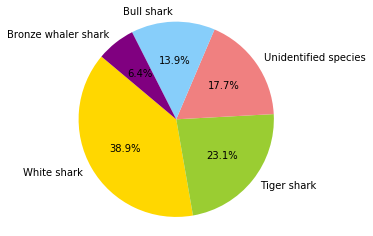

In [33]:
# Aqui me propongo a sacar un piechart de las primeras 5 especies con mayor ocurrencias de ataques
# Lo cual constituye mi primera hipotesis
labels = 'White shark', 'Tiger shark', 'Unidentified species', 'Bull shark', "Bronze whaler shark"
sizes = [333, 198, 152, 119, 55]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "purple"]
explode = (0, 0, 0, 0, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [46]:
# Aqui veo que valores unicos tienen las filas de la columna Activity
# y la elimino por irrelevante con respecto a mis objetivos
Activity_set = set(df["Activity"])
Activity_set
df = df.drop("Activity", axis=1)

In [47]:
# Imprimo la descripcion estadistica de la columna Type
df["Type"].describe()

count           2546
unique             2
top       Unprovoked
freq            2151
Name: Type, dtype: object

In [48]:
# Hago lo mismo con la columna Fatal
df["Fatal"].describe()

count     2546
unique       2
top          N
freq      2157
Name: Fatal, dtype: object

In [49]:
# Elimino la columna species despues de haber logrado el grafico final
df = df.drop("Species", axis=1)

KeyError: "['Species'] not found in axis"

In [50]:
# Imprimo una descriptcion estadistica de todo el dataframe
df.describe()

,Type,Fatal
count,2546,2546
unique,2,2
top,Unprovoked,N
freq,2151,2157


In [51]:
# Hago un dataframe subconjunto del original pero filtrado en base a ciertas condiciones
# En este caso particular quiero los ataques no provocado y no fatales
unprov_not_fatal = df[(df["Type"] == "Unprovoked") & (df["Fatal"] == "N")]

In [52]:
# Aqui veo el resultado
unprov_not_fatal.describe()

,Type,Fatal
count,1768,1768
unique,1,1
top,Unprovoked,N
freq,1768,1768


In [53]:
# En otro dataframe quiero los ataques no provocados pero fatales
unprov_fatal = df[(df["Type"] == "Unprovoked") & (df["Fatal"] == "Y")]
unprov_fatal.describe()

,Type,Fatal
count,383,383
unique,1,1
top,Unprovoked,Y
freq,383,383


In [54]:
# Aqui quiero los provocados no fatales
prov_not_fatal = df[(df["Type"] == "Provoked") & (df["Fatal"] == "N")]
prov_not_fatal.describe()

,Type,Fatal
count,389,389
unique,1,1
top,Provoked,N
freq,389,389


In [55]:
# y respectivamente los provocados y fatales
prov_fatal = df[(df["Type"] == "Provoked") & (df["Fatal"] == "Y")]
prov_fatal.describe()

,Type,Fatal
count,6,6
unique,1,1
top,Provoked,Y
freq,6,6


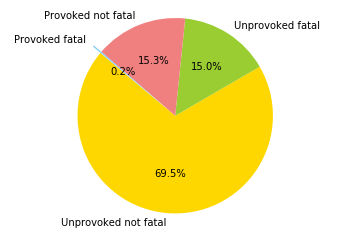

In [56]:
# Aqui procedo a graficar en base a la informacion de cada dataframe derivado del original
labels = 'Unprovoked not fatal', 'Unprovoked fatal', 'Provoked not fatal', 'Provoked fatal'
sizes = [1764, 381, 388, 6]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
# Basado en la grafica generada el 69.5% de los ataques son no fatales y no provocados
# y solamente un 0.2% corresponden a ataques fatales y provocados
# lo cual me proporciona informacion suficiente para creer (y concluir) que los tiburones son de naturaleza "reactiva"
# y no tienden a atacar a los seres humanos y si lo hacen luego huyen (por ende la gran cantidad de ataques no fatales)
# una especulacion basada en esta data es que tal vez los tiburones ataquen al ser humano por curiosidad y al ver que
# no es su tipo de alimento preferido se alejan, y el victimario podria sobrevivir o morir como consecuencia de 
# una hemorragia.
# por otro lado me hace pensar creer que "provocar" a un tiburon tiene que ver mas con interactuar con sus intereses
# como por ejemplo acercarse mucho a sus crias o interactuar con un animal que sea su alimento.